# Занятие 12

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statsmodels.stats.weightstats as ssw

## Оценка распределений

### Дискретное

In [3]:
N = 100
sample = np.random.choice([1,2,3,4,5,6], N)
sample

array([1, 1, 1, 5, 1, 4, 3, 1, 6, 5, 2, 4, 2, 2, 5, 6, 5, 2, 3, 5, 4, 2,
       2, 5, 6, 6, 6, 3, 6, 2, 6, 4, 3, 3, 2, 3, 3, 5, 6, 5, 5, 1, 3, 1,
       5, 3, 3, 5, 5, 1, 1, 2, 2, 4, 3, 6, 4, 4, 6, 4, 1, 5, 2, 4, 6, 5,
       5, 6, 3, 3, 1, 2, 1, 2, 1, 4, 5, 4, 2, 3, 5, 5, 6, 5, 5, 3, 4, 5,
       3, 5, 6, 4, 2, 6, 4, 6, 5, 1, 1, 4])

In [4]:
# оценим функцию вероятности частотами
unique_value, counts = np.unique(sample, return_counts=True)

print(counts)
print(counts / N)
print(unique_value)
print (np.sum(counts / N))

[15 15 16 15 23 16]
[0.15 0.15 0.16 0.15 0.23 0.16]
[1 2 3 4 5 6]
1.0


In [5]:
for N in [10, 100, 1000, 10000, 100000]:
    sample = np.random.choice([1,2,3,4,5,6], N)
    unique_value, counts = np.unique(sample, return_counts=True)
    print(unique_value)
    print("{}: {} {}".format(N, counts/N, np.sum(counts/N)))

[1 2 3 4 5]
10: [0.2 0.2 0.2 0.3 0.1] 1.0000000000000002
[1 2 3 4 5 6]
100: [0.17 0.1  0.17 0.19 0.15 0.22] 1.0000000000000002
[1 2 3 4 5 6]
1000: [0.172 0.149 0.157 0.173 0.179 0.17 ] 1.0
[1 2 3 4 5 6]
10000: [0.1665 0.1625 0.1653 0.1717 0.1719 0.1621] 1.0
[1 2 3 4 5 6]
100000: [0.16848 0.16543 0.16599 0.16685 0.16823 0.16502] 1.0


In [6]:
1/6

0.16666666666666666

### Непрерывное

In [7]:
# возьмём выборку из нормального распределения
norm_rv = sts.norm(0, 1)
sample = norm_rv.rvs(100)  #10000
#sample

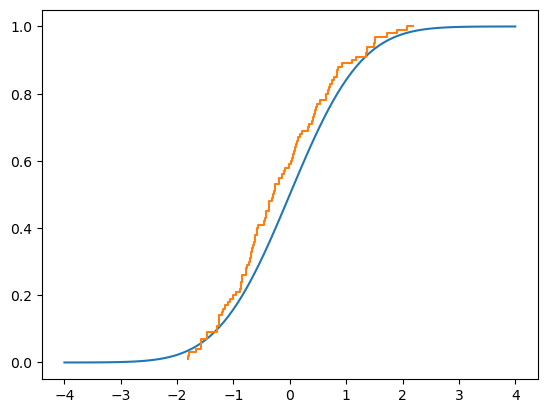

In [8]:
x = np.linspace(-4,4,100)
cdf = norm_rv.cdf(x)
plt.plot(x, cdf, label='Теоретическая функция распределения')

# Воспользуемся библиотекой для оценки (спасибо питон!)
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='Оценка функции распределения')


[ 5.  3.  8.  5. 13. 10. 10.  7.  7.  9.  6.  5.  2.  3.  3.  2.  2.] [-1.81529306 -1.57992212 -1.34455118 -1.10918024 -0.87380929 -0.63843835
 -0.40306741 -0.16769647  0.06767447  0.30304541  0.53841635  0.77378729
  1.00915823  1.24452918  1.47990012  1.71527106  1.950642    2.18601294] 18


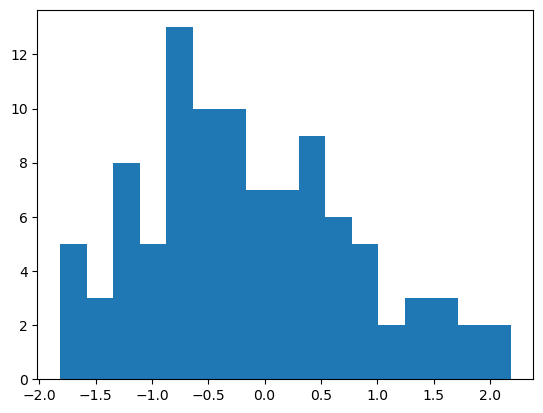

In [9]:
# теперь посмотрим на функцию плотности
b, n, _ = plt.hist(sample, bins=17 )
print(b, n, len(n))

In [10]:
len(n)

18

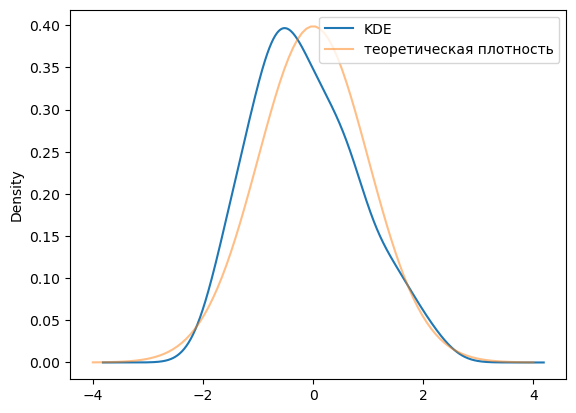

In [11]:
# ядерное сглаживание
# можно сделать в pandas
df = pd.DataFrame(sample, columns=['KDE'])
ax = df.plot(kind='density')

# строим теоретическую плотность
x = np.linspace(-4,4,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

### Предсказательный интервал
Имеем $X \sim N(\mu, \sigma^2)$. Согласно правилу [2-х сигм](https://ru.wikipedia.org/wiki/%D0%A1%D1%80%D0%B5%D0%B4%D0%BD%D0%B5%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%BE%D1%82%D0%BA%D0%BB%D0%BE%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5#%D0%9F%D1%80%D0%B0%D0%B2%D0%B8%D0%BB%D0%BE_%D1%82%D1%80%D1%91%D1%85_%D1%81%D0%B8%D0%B3%D0%BC) имеем $$\mathbf{P}(\mu - 2 \sigma \leq X \leq \mu + 2 \sigma) \approx 0.95$$



Если мы применим данное правило к стандартному нормальному распределению $X \sim N(0,1)$, то получим
$$\mathbf{P}(0 - 2 \cdot 1 \leq X \leq 0 + 2 \cdot 1) \approx 0.95$$

Проиллюстрируем это визуально

In [12]:
# возьмём выборку из стандартного нормального распределения
norm_rv = sts.norm(0, 1)
sample = norm_rv.rvs(100)
sample

array([ 0.3203407 , -2.15487938, -2.36431402,  1.20397805,  0.14669192,
       -0.30934978, -0.51045353, -0.50920293,  0.13864641,  1.83672195,
       -0.61438208,  1.39225136, -0.34243711,  0.97233194,  0.66867229,
       -0.50290949,  1.33010267,  0.41568028, -0.57691223, -0.91504866,
        1.53900525,  1.02867454,  0.04056111, -0.64412635,  1.30878744,
       -0.14705722, -0.24495965,  0.51498994, -0.46823123, -0.31266458,
       -0.42463193, -0.04460981, -1.65645049, -1.13169386,  0.59069307,
       -0.12979769, -0.70089366, -0.33300467,  1.03711269, -1.33577442,
        0.79678823, -0.41207913, -0.86766264,  0.22014991, -2.56802715,
        1.30082636, -1.57309934,  0.74925513,  0.77399372,  1.31277548,
       -1.61871527,  0.2532072 ,  0.34157932,  1.91576031, -1.08543378,
       -0.51338934, -2.01194674,  0.89083816,  1.12360585, -0.41102643,
        1.24634946,  0.01909389, -0.57805165, -0.19625651,  0.76838692,
        1.3921692 , -0.55975066, -0.99473608, -2.23368574, -0.50

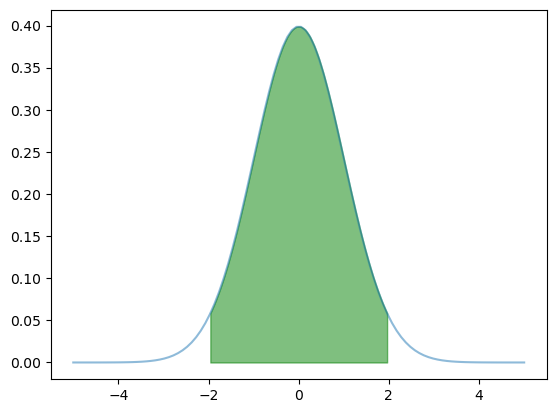

In [13]:
x = np.linspace(-5,5,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
to_fill = np.linspace(-1.96, 1.96, 100)
plt.fill_between(to_fill, norm_rv.pdf(to_fill), alpha=0.5, color='green')

In [14]:
norm_rv.pdf(-1.96)

0.058440944333451476

Оценка эта неточная, и не всегда нам нужно именно 0.95 вероятностной массы. 

В общем случае работают с квантилями

In [15]:
norm_rv.ppf(0.5)

0.0

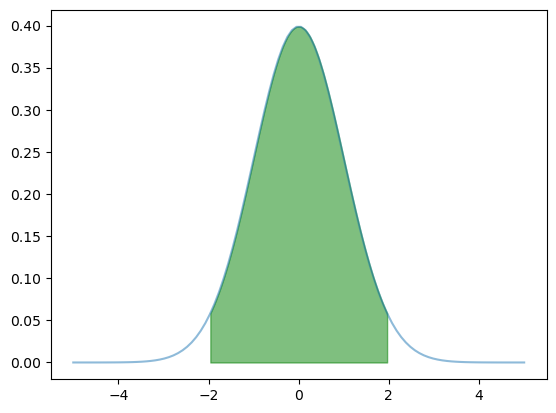

In [16]:
alpha = 0.05
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
q_a = norm_rv.ppf(alpha/2)
q_b = norm_rv.ppf(1-alpha/2)
to_fill = np.linspace(q_a, q_b, 100)
plt.fill_between(to_fill, norm_rv.pdf(to_fill), alpha=0.5, color='green')

Теперь, если мы хотим найти такой интервал в котором с вероятностью 95% окажется реализация нашей случайной величины, нам лишь нужно найти соответствующие квантили $X_{\frac{\alpha}{2}}$ и $X_{1-\frac{\alpha}{2}}$.

Такой интервал можем найти для произвольно распределенной случайной величины

В частности, для нормально распределенной случайной величины
$$\mathbf{P}(\mu - \zeta_{1-\frac{\alpha}{2}} \sigma \leq X \leq \mu + \zeta_{1-\frac{\alpha}{2}} \sigma) = 1-\alpha$$

$\zeta_{\alpha}$ будем обозначать квантиль порядка $\alpha$ стандартного нормального распределения (то-есть распределения $N(0,1)$). Тут мы воспользовались тем, что $\zeta_{\frac{\alpha}{2}} = - \zeta_{1-\frac{\alpha}{2}}$

$ \zeta_{0.975} \approx 1.95996 \approx 2$



**Предсказательный интервал оценивает диапазон значений**

### Доверительный интервал
Точечные оценки параметров это уже что-то, но также представляет интерес и то, в каком диапазоне изменяются оцениваемые параметры, например, средние значения.

Отвечают на вопрос **в каком диапазоне скорее всего лежит оцениваемый параметр**



Например, снова возьмем выборку из нормального распределения $X^n = (X_1, \dotso, X_n),\ X \sim \mathbf{N}(\mu, \sigma^2)$

Пусть нам известна дисперсия, т.е $\sigma^2$. Тогда по [свойствам](http://www.machinelearning.ru/wiki/index.php?title=%D0%9D%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5) нормального распределения получаем $\sum_{i=1}^{n} X_i \sim \mathbf{N}(n\mu, n\sigma^2) \rightarrow \frac{\sum_{i=1}^{n} X_i}{n} = \overline{X_n} \sim \mathbf{N}(\mu, \frac{\sigma^2}{n})$

По формуле для предсказательного интервала получаем $$\mathbf{P}(\mu - \zeta_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}} \leq \overline{X_n} \leq \mu + \zeta_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}) = 1-\alpha$$

Теперь, переносим $\overline{X_n}$ и $\mu$ в неравенствах, и получаем доверительный интервал для $\mu$

$$\mathbf{P}(\overline{X_n} - \zeta_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}} \leq \mu \leq \overline{X_n} + \zeta_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}) = 1-\alpha$$

Интервал для N 10 4.165 ... 15.322
Интервал для N 50 4.627 ... 9.616
Интервал для N 100 4.736 ... 8.264
Интервал для N 1000 4.917 ... 6.032
Интервал для N 10000 4.974 ... 5.326


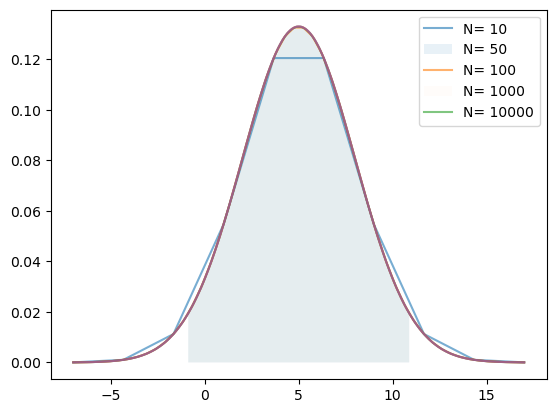

In [17]:

# Задание, 
# 1) сгенерируйте 10, 50, 100 примеров из нормального распределения с произвольными мат ожиданием и дисперсией
# 2) Постройте по формуле интервал с alpha = 0.05
# ваш код тут
mu = 5
sigma = 3
norm_rv = sts.norm(mu, sigma)
alpha = 0.05
N = [10, 50, 100, 1000, 10000]
#colors = ['cyan', "purple", "orange", "yellow"]
for n in N:
    sample = np.linspace(-7, 17, n)
    pdf = norm_rv.pdf(sample)
    plt.plot(sample, pdf, alpha = .6)
    q_a_m = norm_rv.ppf(alpha/2)
    q_a_p = norm_rv.ppf(1 - alpha/2)
    to_fill = np.linspace(q_a_m, q_a_p, 100)
    plt.fill_between(to_fill, norm_rv.pdf(to_fill), alpha = 1/n)
    plt.legend([" ".join(("N=", str(n))) for n in N])
    print ("Интервал для N %.f %.3f ... %.3f" % (n, sample.mean() + q_a_m * sigma/np.sqrt(n) ,#!!! + т.к. q_a_m отрицательное
                                                sample.mean() + q_a_p * sigma/np.sqrt(n)))

Случай известной дисперсии как правило встречается для измерительных приборов, когда нам известная его погрешность.

Есть метод, позволяющий построить доверительный интервал и для такого случая. Разница будет лишь в том, что вместо выборочной дисперсии будет взята выборочная дисперсия, а вместо квантилей стандартного нормального распределения используют квантили распределения Стьюдента (согласно которой распределена так называемая t-статистика)

Но что делать, если распределение отлично от нормального или это доподлино неизвестно?


К счастью...


## Центральная предельная теорема

In [18]:
a = 1
b = 4

# обратите внимание, что в этой функции задается левая граница и масштаб, а не левая и правая границы:
uniform_rv = sts.uniform(a, b-a)

uniform_rv.rvs(10)

array([1.7763099 , 3.56074732, 2.69085497, 2.42447514, 3.01384462,
       2.34632697, 1.89608106, 3.72769229, 1.45793038, 2.89818238])

In [19]:
N = 100
# сгенерируем много выборочных средних
means = []
for i in range(10000):
    means.append(np.mean(uniform_rv.rvs(N)))

(array([0.01861501, 0.0093075 , 0.0093075 , 0.        , 0.03723002,
        0.03723002, 0.05584503, 0.10238255, 0.10238255, 0.13961257,
        0.2140726 , 0.4281452 , 0.60498779, 0.67014032, 0.87490542,
        0.82836789, 1.56366074, 1.61950577, 1.84288588, 2.44787366,
        2.22449356, 3.06216895, 2.99701642, 3.49031416, 3.81607681,
        3.86261433, 4.38383458, 4.40244959, 4.80267228, 4.47690963,
        4.55136966, 4.65375221, 4.24422202, 4.28145203, 3.40654662,
        3.32277908, 2.88532637, 2.78294382, 2.55956372, 2.04765097,
        1.77773334, 1.85219338, 1.2658206 , 1.02382549, 0.85629041,
        0.70737034, 0.48399023, 0.35368517, 0.24199511, 0.2140726 ,
        0.11169005, 0.07446004, 0.10238255, 0.04653752, 0.03723002,
        0.0093075 , 0.0093075 , 0.01861501, 0.0093075 , 0.0093075 ,
        0.        , 0.        , 0.        , 0.0093075 ]),
 array([2.18350662, 2.19425064, 2.20499465, 2.21573867, 2.22648269,
        2.23722671, 2.24797073, 2.25871475, 2.26945877, 2.

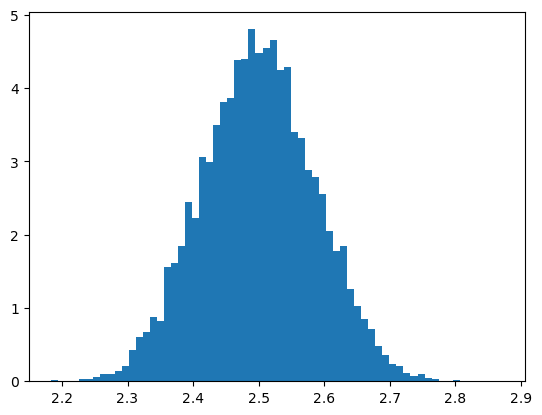

In [20]:
plt.hist(means, density=True, bins='auto')

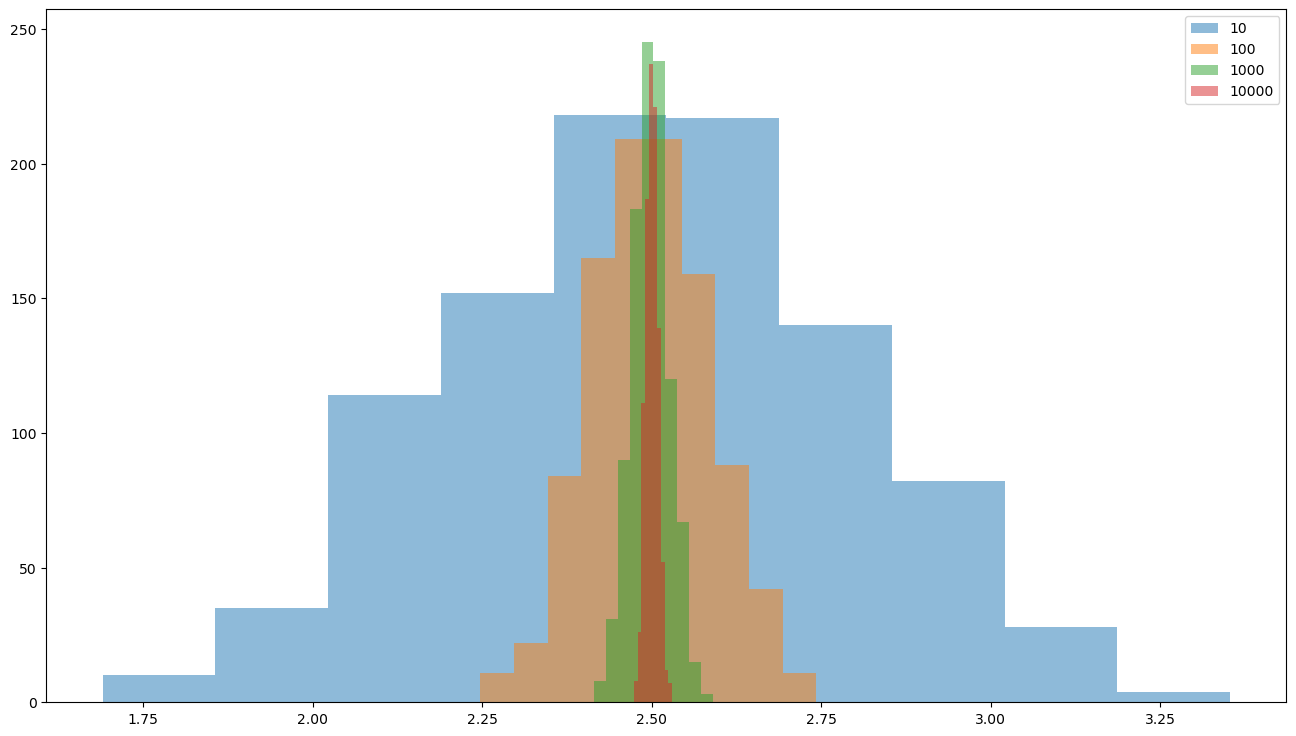

In [21]:
plt.figure(figsize=(16,9))
# сгенерируем много выборочных средних
for N in [10, 100, 1000, 10000]:
    means = []
    for i in range(1000):
         means.append(np.mean(uniform_rv.rvs(N)))
    plt.hist(means, alpha=0.5)

plt.legend(['10', '100', '1000', '10000'])
plt.show()

In [22]:
uniform_rv.rvs(N)

array([2.93126535, 3.82938444, 2.5396959 , ..., 3.95618326, 1.01208901,
       2.42793753])

In [23]:
N = 30
# сгенерируем много выборочных средних
means = []
for i in range(1000):
    means.append(np.mean(uniform_rv.rvs(N)))

means = np.array(means).astype(np.float32)

In [24]:
uniform_rv.mean()

2.5

In [25]:
uniform_rv.var()

0.75

In [26]:
uniform_rv.std()

0.8660254037844386

[]

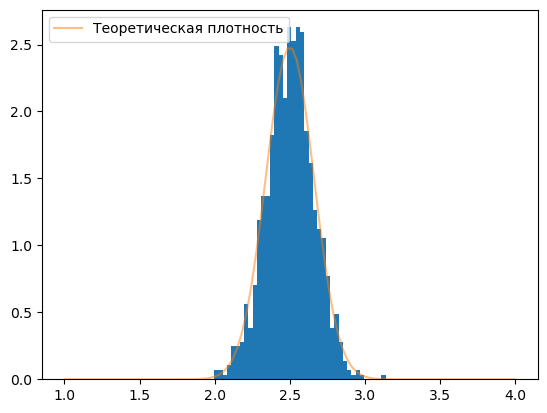

In [27]:
norm_rv = sts.norm(loc=uniform_rv.mean(), scale=uniform_rv.std() / np.sqrt(N-1))
plt.hist(means, density=True, bins=40)
x = np.linspace(1,4, 100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='Теоретическая плотность', alpha=0.5)
plt.legend()
plt.plot()

In [109]:
N = 300
data = uniform_rv.rvs(N)
z_alpha = sts.norm.ppf(0.975) # Two-tailed, alpha=0.05
data_mean = np.mean(data)
data_std = data.std(ddof=1)/np.sqrt(N-1)
data_mean, data_std

(2.531616345276202, 0.051443870746199126)

In [110]:

print("Доверительный интервал для среднего по цпт: [{}, {}] ".format(
    data_mean - z_alpha * data_std , data_mean + z_alpha * data_std
))
print("Доверительный интервал для среднего по цпт интервальная оценка: {} ".format(
    sts.norm.interval(alpha=.95, loc=data_mean, 
                      scale=data_std) # alternative 'two-sided' only
))

print("Доверительный интервал для среднего по цпт методом _zconfint_generic: {} ".format(
    ssw._zconfint_generic(data_mean,  data_std, alpha=.05 , alternative='two-sided')
))

Доверительный интервал для среднего по цпт: [2.430788211388318, 2.6324444791640857] 
Доверительный интервал для среднего по цпт интервальная оценка: (2.430788211388318, 2.6324444791640857) 
Доверительный интервал для среднего по цпт методом _zconfint_generic: (2.430788211388318, 2.6324444791640857) 


#### То же и для дискретных, посмотрим на примере биномиального распределения

In [29]:
binomial_rv = sts.binom(20, 0.4)
binomial_rv.rvs(10)

# мат ожидание np = 20*0.4 = 8
# дисперсия npq = np(1-p) = 20*0.4*0.6 = 8 * 0.6 = 4.8

array([7, 6, 9, 7, 7, 8, 8, 9, 8, 5])

Text(0.5, 0, '$x$')

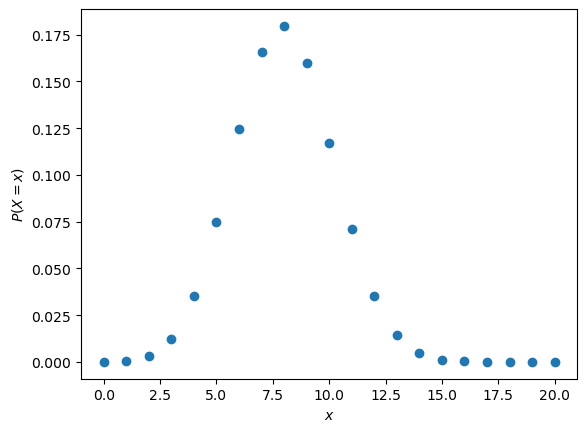

In [30]:
x = np.linspace(0,20,21)
pmf = binomial_rv.pmf(x)
plt.plot(x, pmf, 'o')

plt.ylabel('$P(X=x)$')
plt.xlabel('$x$')

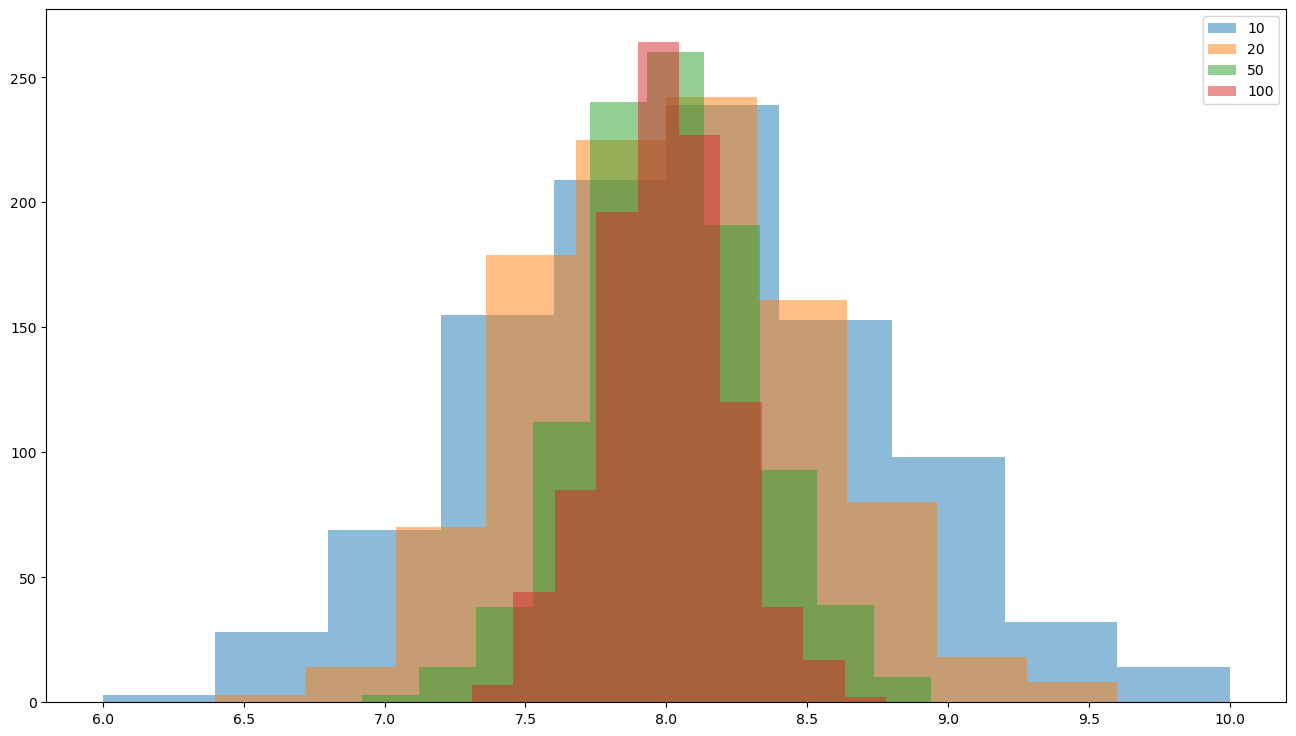

In [31]:
plt.figure(figsize=(16,9))
# сгенерируем много выборочных средних
for N in [10, 20, 50, 100]:
    means = []
    for i in range(1000):
         means.append(np.mean(binomial_rv.rvs(N)))
    plt.hist(means, alpha=0.5)

plt.legend(['10', '20', '50', '100'])
plt.show()

### Всегда ли ЦПТ хорошо работает?
Вообще в полной формулировке есть формальные требования, определяющие границы применимости данной теоремы. Но пока что, будем говорить, что применять ЦПТ можно, если кол-во примеров по крайней мере пара десятков (30-50), и само распределение случайно величины $X$ не является явно ассимметричным ("скошенным")

#### Попробуем уменьшить вероятность успеха в серии n независимых испытаний, тем самым, сделаем наше распределение успехов несколько более ассиметричным

In [32]:
binomial_rv = sts.binom(20, 0.01)
binomial_rv.rvs(10)

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

Text(0.5, 0, '$x$')

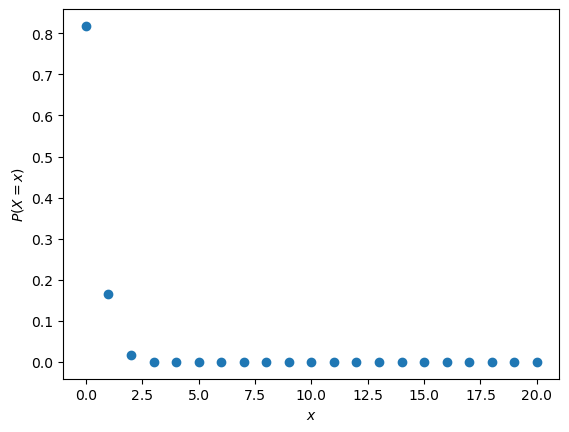

In [33]:
x = np.linspace(0,20,21)
pmf = binomial_rv.pmf(x)
plt.plot(x, pmf, 'o')
plt.ylabel('$P(X=x)$')
plt.xlabel('$x$')

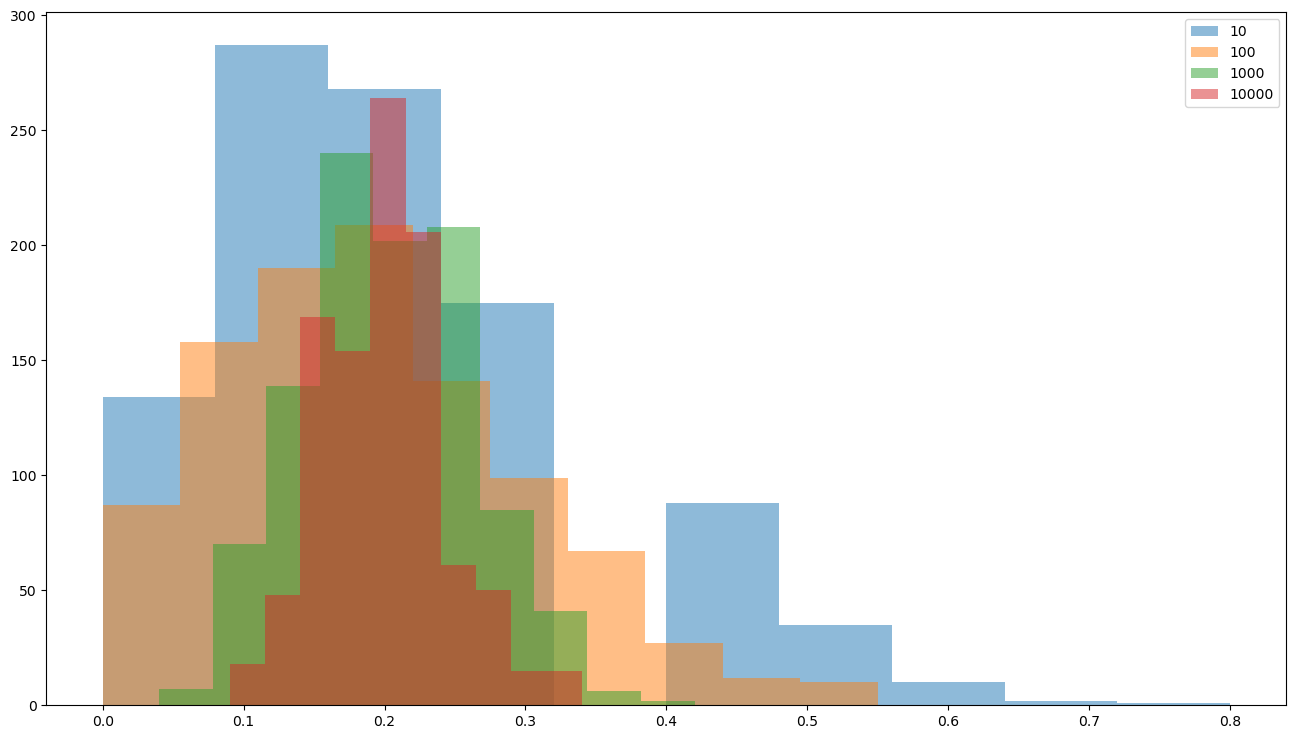

In [34]:
plt.figure(figsize=(16,9))
# сгенерируем много выборочных средних
for N in [10, 20, 50, 100]:
    means = []
    for i in range(1000):
        means.append(np.mean(binomial_rv.rvs(N)))
    plt.hist(means, alpha=0.5)

plt.legend(['10', '100', '1000', '10000'])
plt.show()